# Hierarchical Clustering
We have two types of Hierarchical Clustering here:
1. **Agglomerative Clustering** (Bottom to Top Clustering)
    -  Begins with n clusters and goes till 1 cluster
2. **Divisive Clustering** (Top to Bottom Clustering)
    - Begins with 1 cluster and goes till n clusters

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings('ignore')

In [64]:
country = pd.read_csv(r"C:\Users\Bhupendra\Desktop\DataCenter\Clustering\Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [65]:
df = country.drop('country', axis = 1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Scaling

In [81]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df)

### Types of Linkages:
1. **Single Linkage**
2. **Complete Linkage**
3. **Average Linkage**
4. **Centroid Linkage**

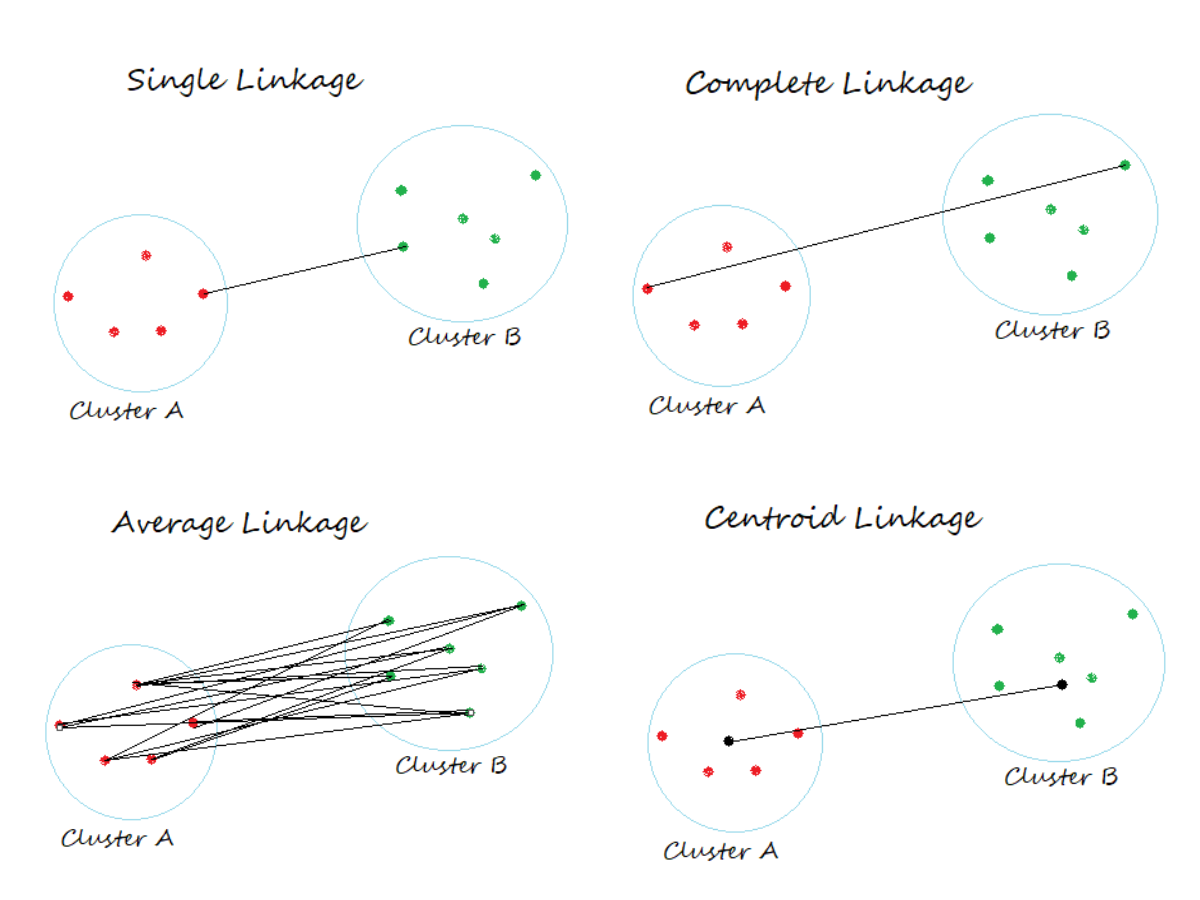

### Single Linkage Clustering

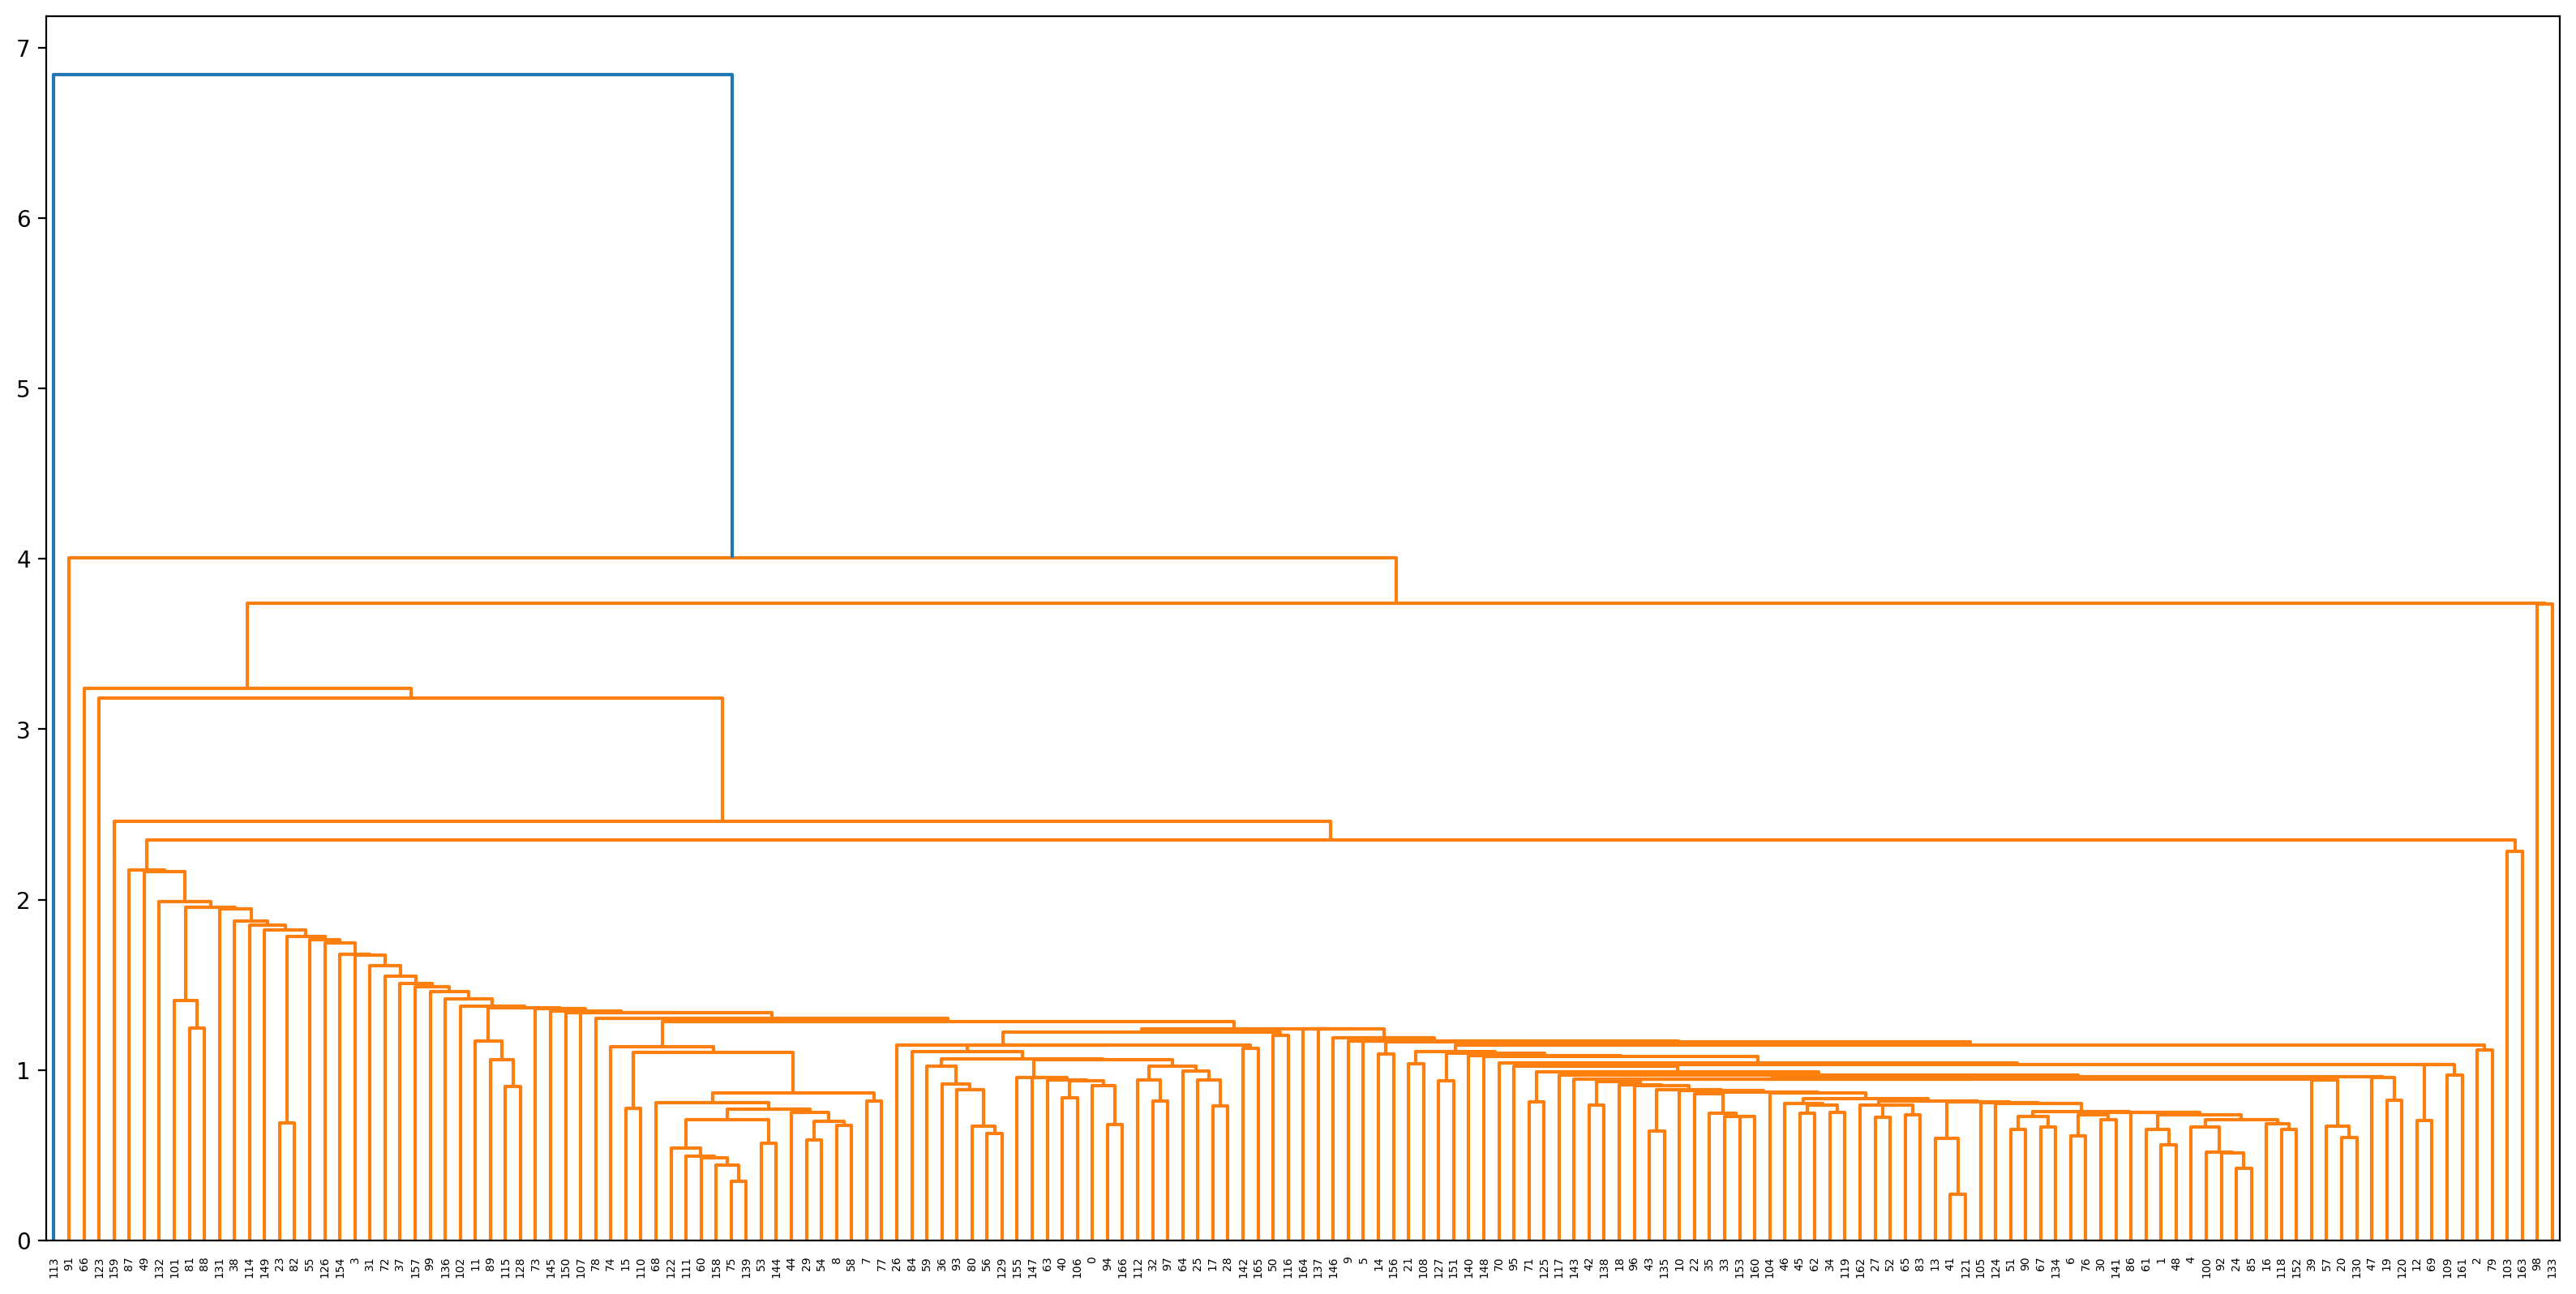

In [82]:
# Single Linkage Clustering

plt.figure(figsize = (20,10), dpi = 200)
single = hierarchy.linkage(scaled_data, method = "single", metric = 'euclidean')
hierarchy.dendrogram(single)
plt.show()

## Complete Linkage

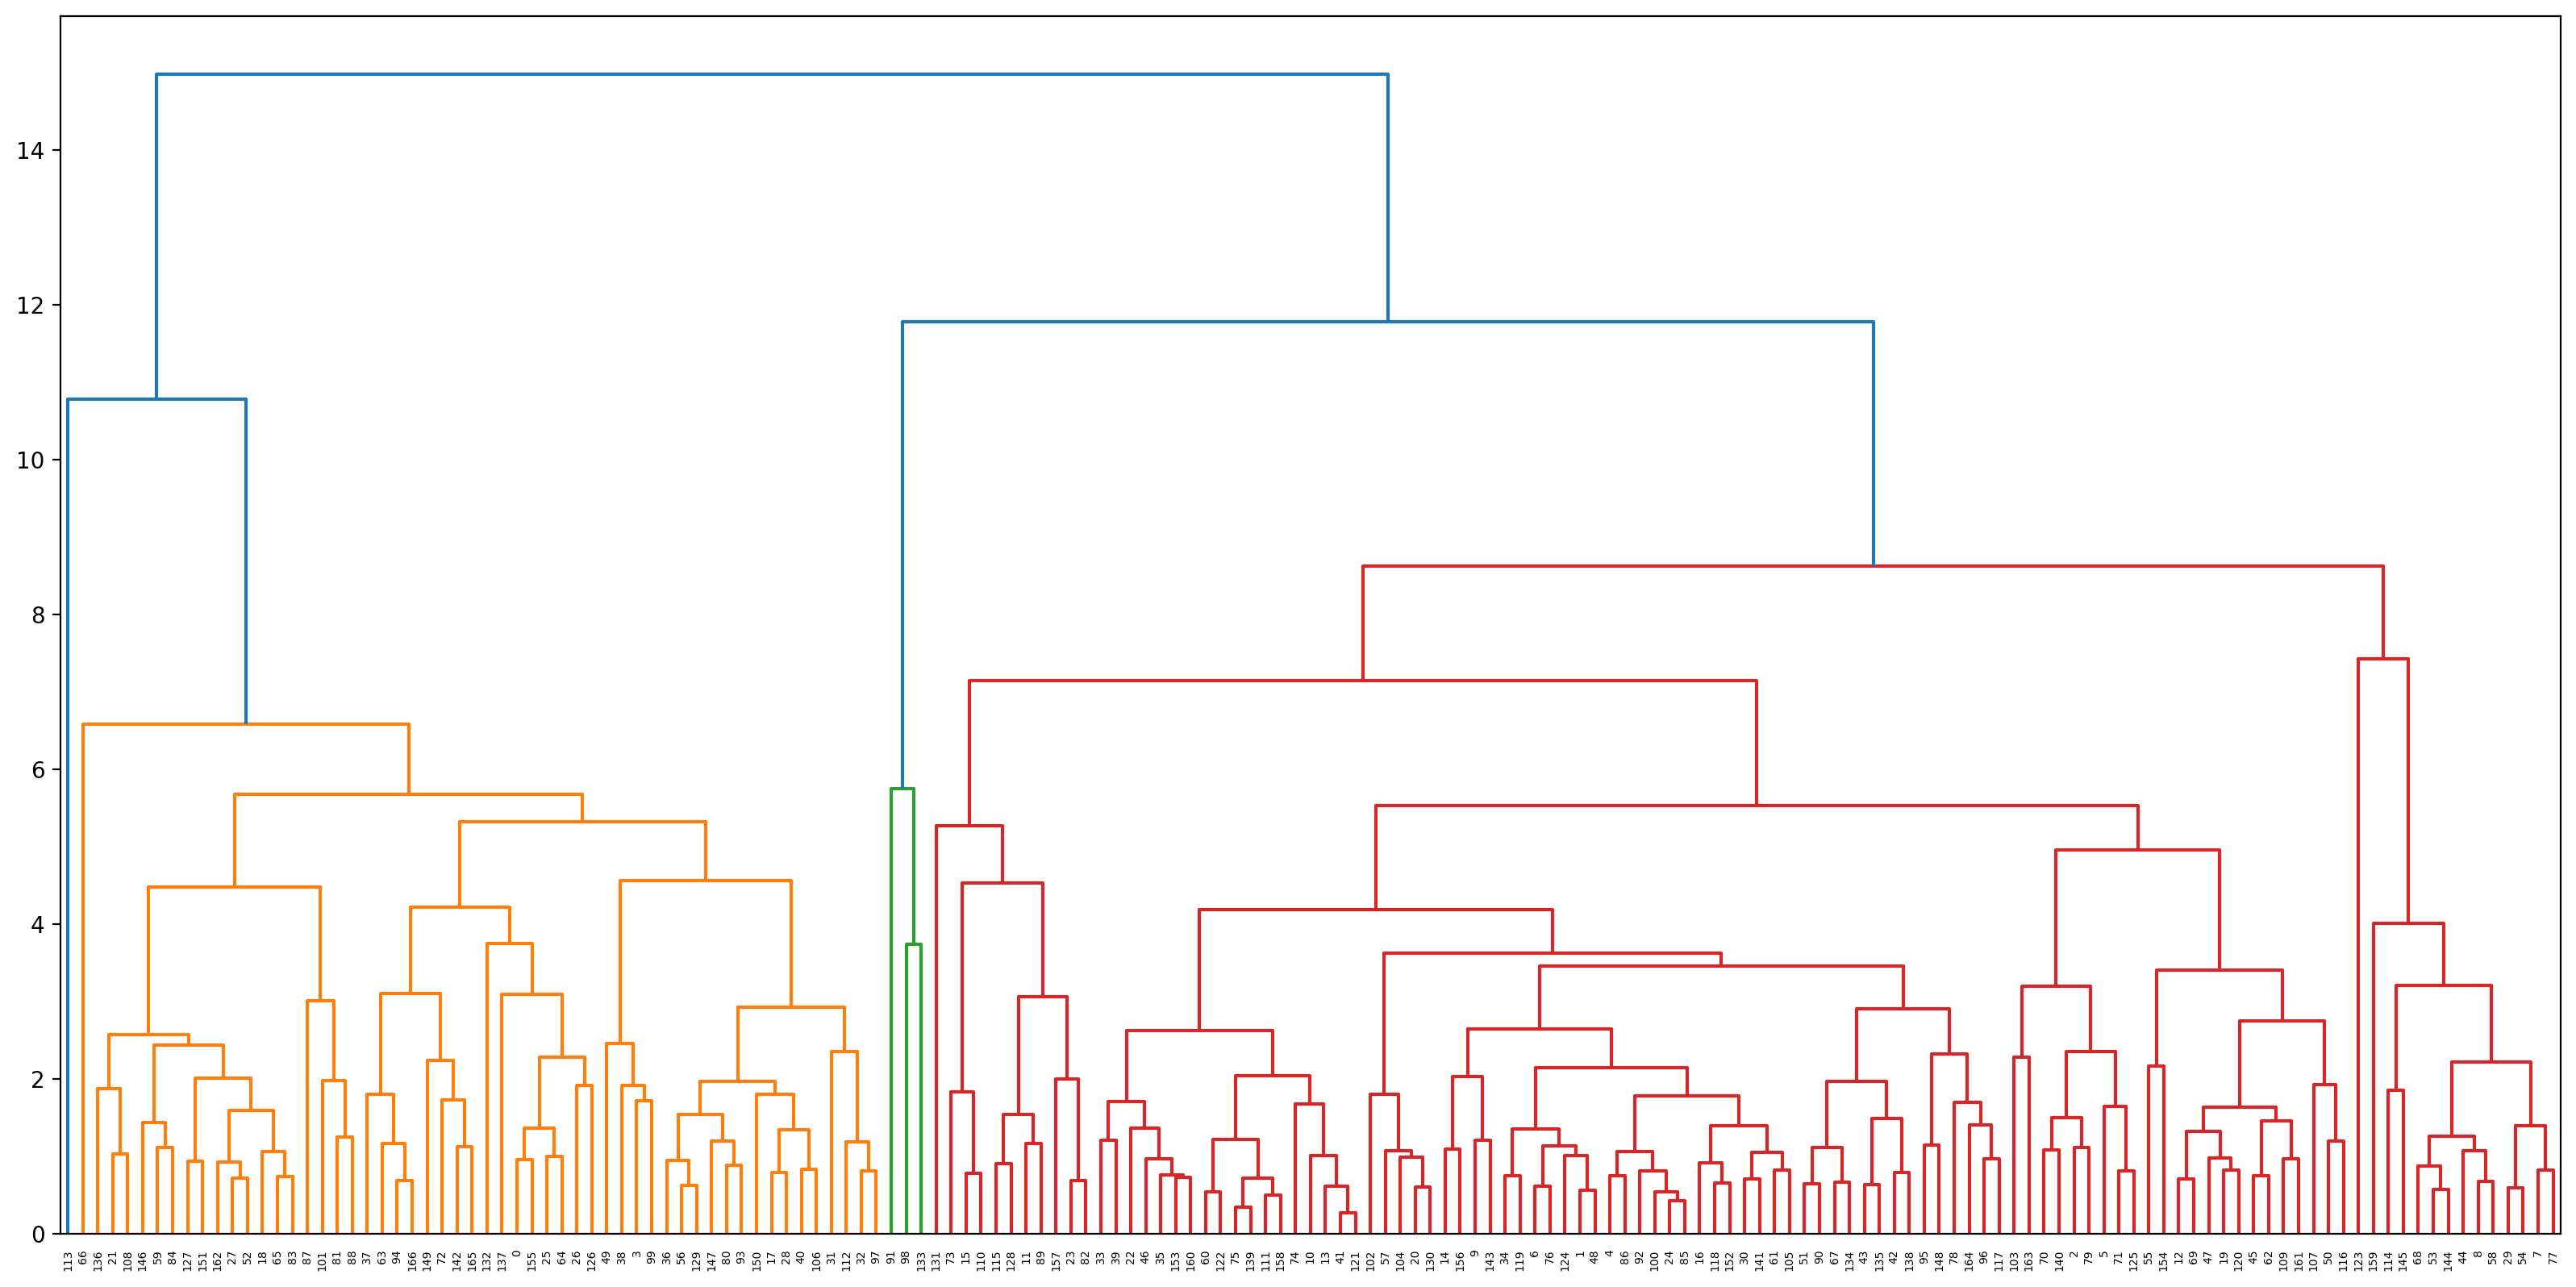

In [83]:
plt.figure(figsize = (20,10), dpi = 200)
complete = hierarchy.linkage(scaled_data, method = "complete", metric = 'euclidean')
hierarchy.dendrogram(complete)
plt.show()

## Average Linkage

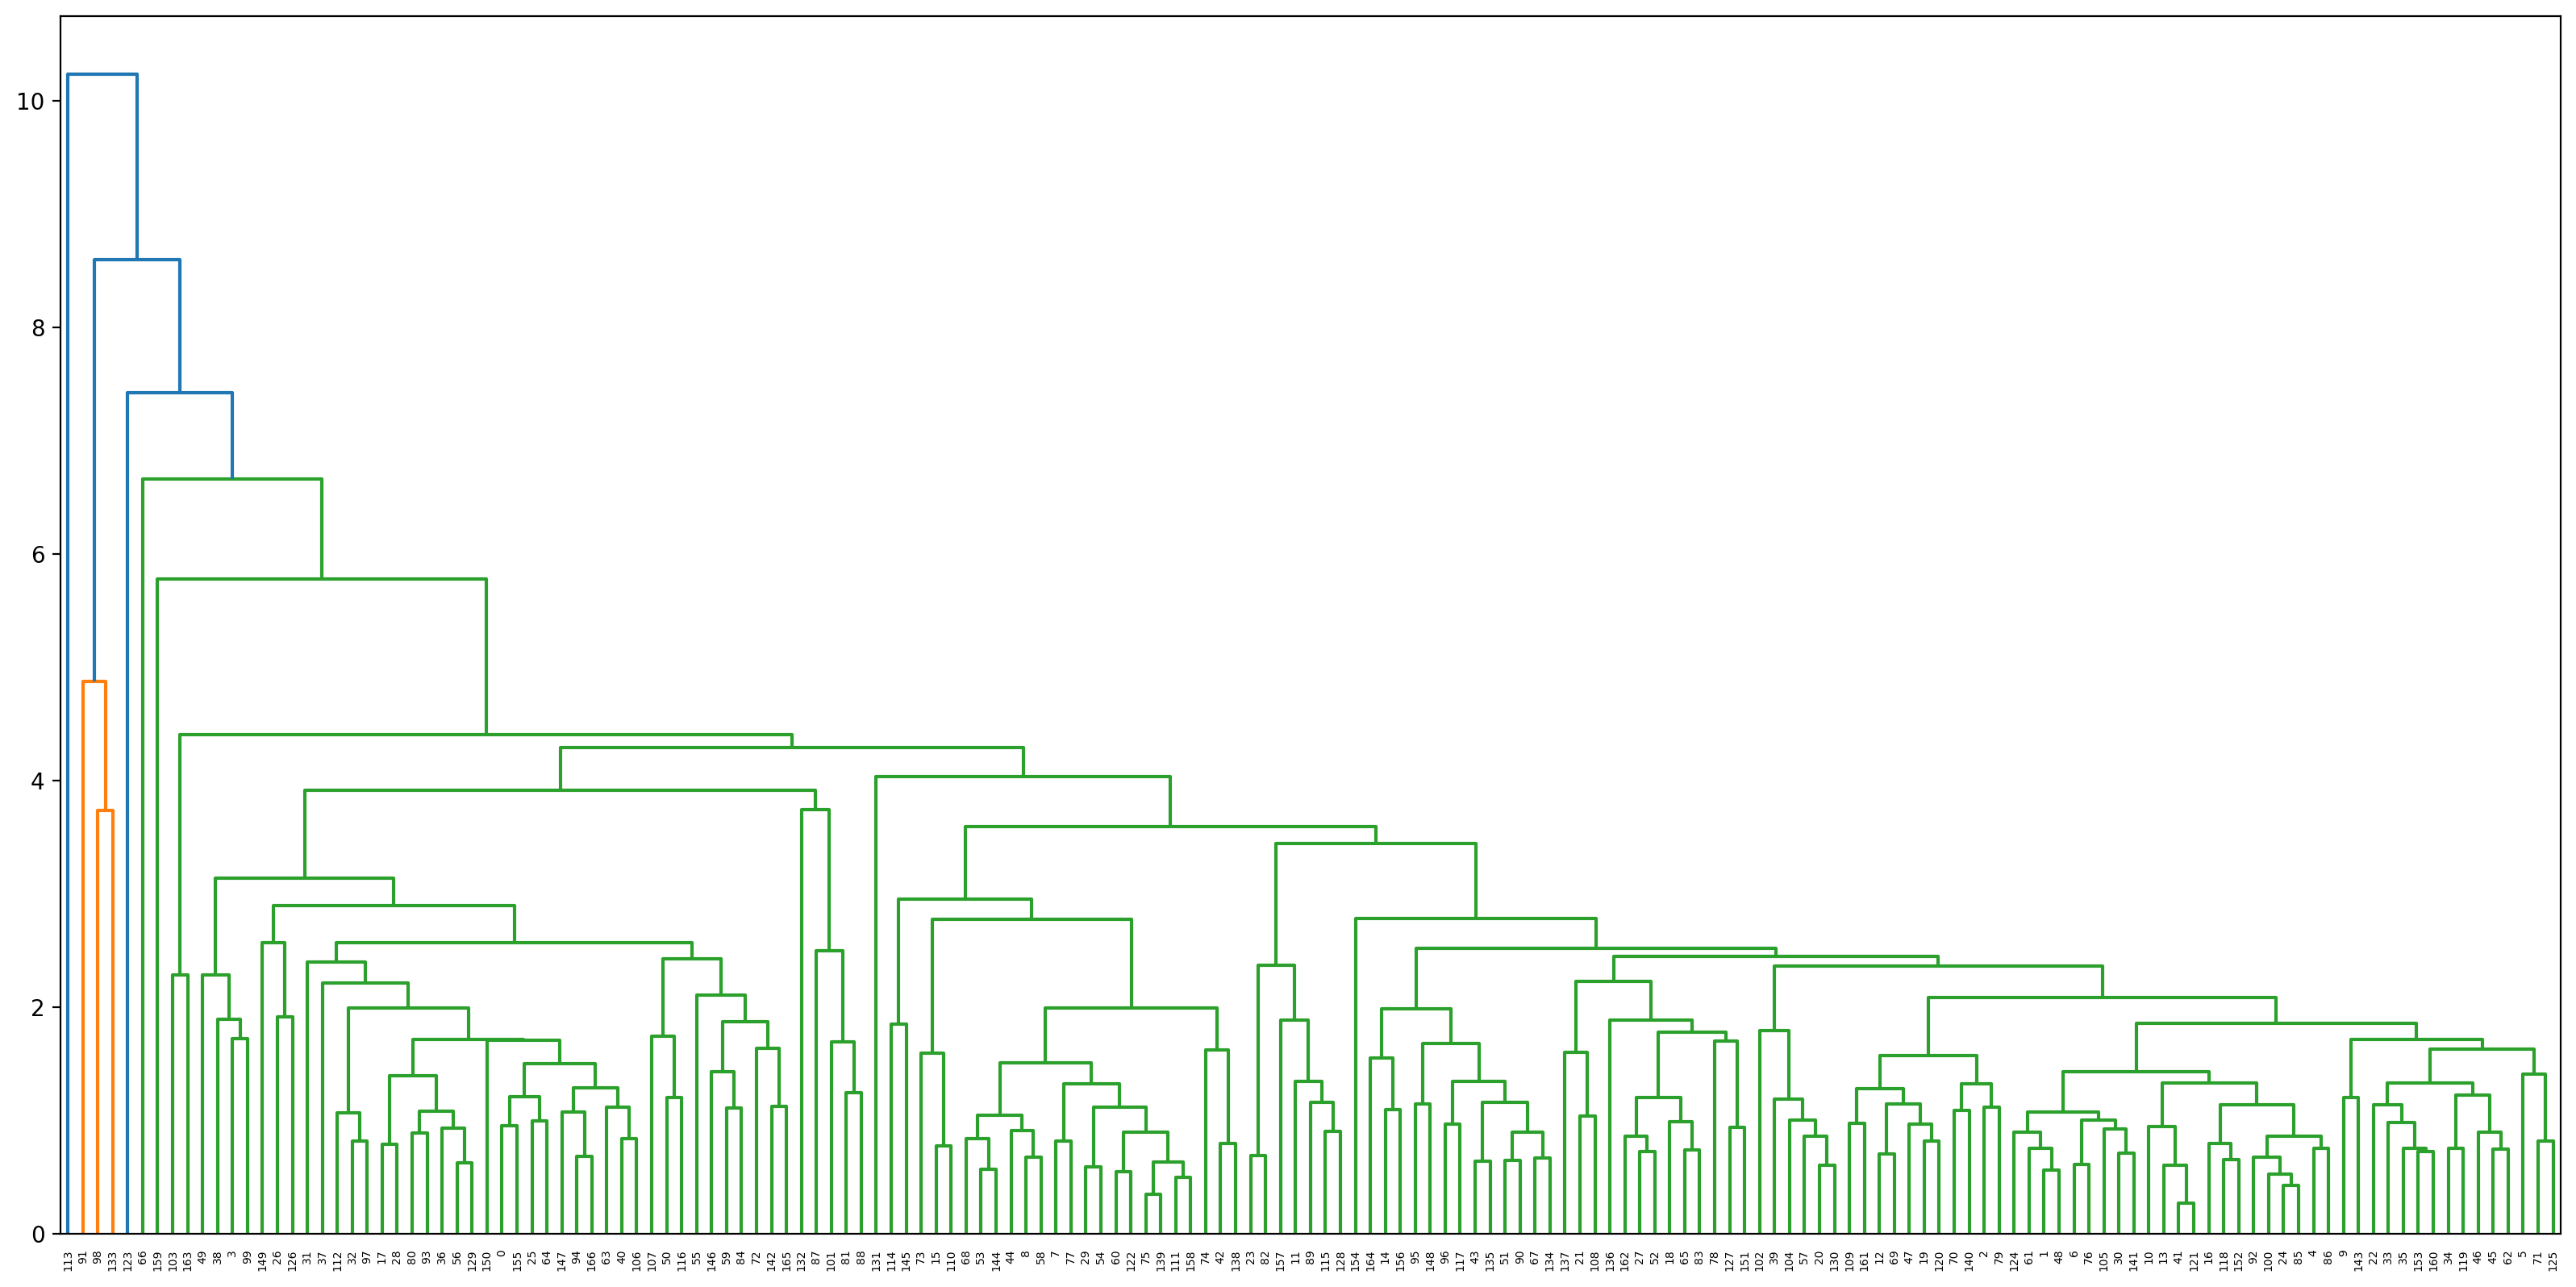

In [84]:
plt.figure(figsize = (20,10), dpi = 200)
avg = hierarchy.linkage(scaled_data, method = "average", metric = 'euclidean')
hierarchy.dendrogram(avg)
plt.show()

In [85]:
scaled_data[0]

array([ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
        0.15733622, -1.61909203,  1.90288227, -0.67917961])

In [86]:
scaled_data[155]

array([ 1.06272222, -0.87849025,  0.80125265, -0.75776682, -0.81188739,
        0.26740351, -1.55142162,  2.12152548, -0.67688123])

## Cut Tree

In [87]:
labels = hierarchy.cut_tree(complete, n_clusters = 3).reshape(-1,)
labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [88]:
labeled_data = pd.concat([country,pd.DataFrame(labels, columns = ['class'])], axis = 1)

In [89]:
labeled_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [90]:
labeled_data['class'].value_counts()

1    109
0     55
2      3
Name: class, dtype: int64

In [91]:
labeled_data[labeled_data['class'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [92]:
labeled_data[labeled_data['class'] == 0].sort_values(by = ['gdpp','income','exports','imports']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
